In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_excel("initial_investments_dataset.xlsx")

In [17]:
df.head()

,Business_ID,Business_Size,Industry_Type,Annual_Revenue,Num_Employees,Current_Tech_Adoption_Level,ML_Knowledge_Level,Past_Investments_in_Tech,Reason_For_Investment,Likelihood_To_Adopt_Next_Year
0,BIZ00001,Medium,Healthcare,15.042297,987,Low,NaN,2.770894,Cost Reduction,0.278982
1,BIZ00002,Large,Manufacturing,9.993261,145,Low,Intermediate,0.466053,Efficiency,0.426869
2,BIZ00003,Medium,Manufacturing,7.545993,644,Moderate,NaN,2.906252,Competitor Pressure,0.222874
3,BIZ00004,Medium,Retail,10.369056,879,Low,Advanced,0.109230,Efficiency,0.289781
4,BIZ00005,Small,Tech,8.348398,408,Low,Intermediate,1.286876,Competitor Pressure,0.443337


In [19]:
df.shape

(10000, 10)

In [21]:
# Define features and target
X = df.drop(columns=['Business_ID', 'Likelihood_To_Adopt_Next_Year'])
y = df['Likelihood_To_Adopt_Next_Year']


In [23]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

In [25]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [27]:
# Pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

In [32]:
# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(0.9256271310299369, 0.0030986562402261415)

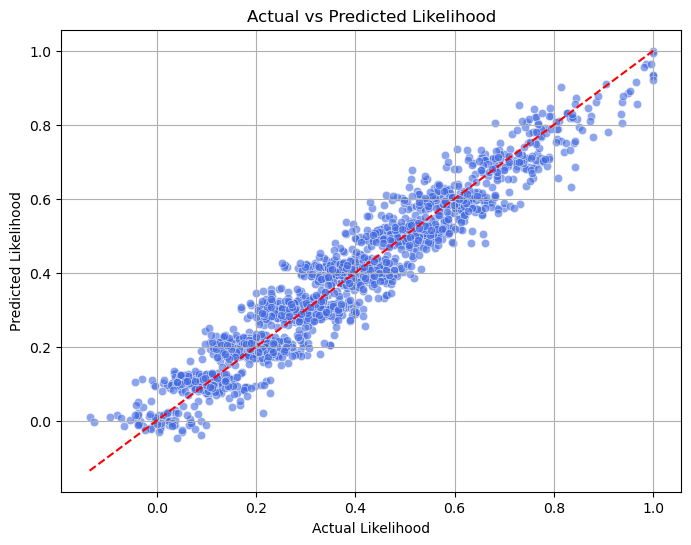

In [35]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Likelihood")
plt.ylabel("Predicted Likelihood")
plt.title("Actual vs Predicted Likelihood")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid(True)
plt.show()

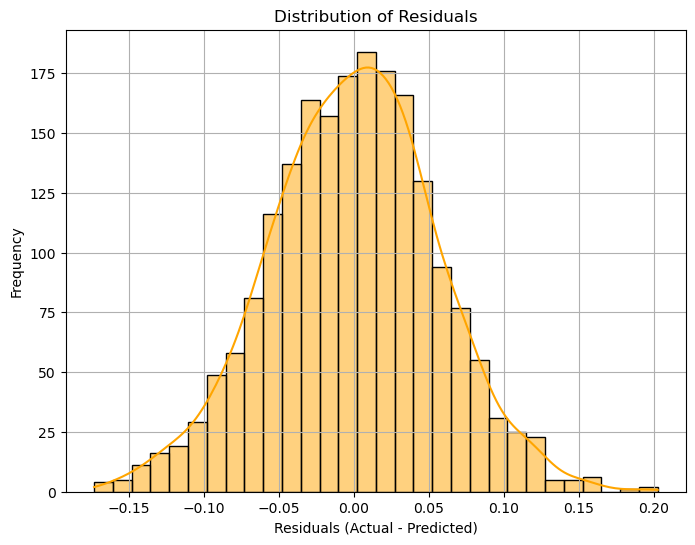

In [37]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()